# Credit Card Fraud Detection

### 1. Importing  Libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. The Data Set

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('./creditcard.csv')

In [3]:
data.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


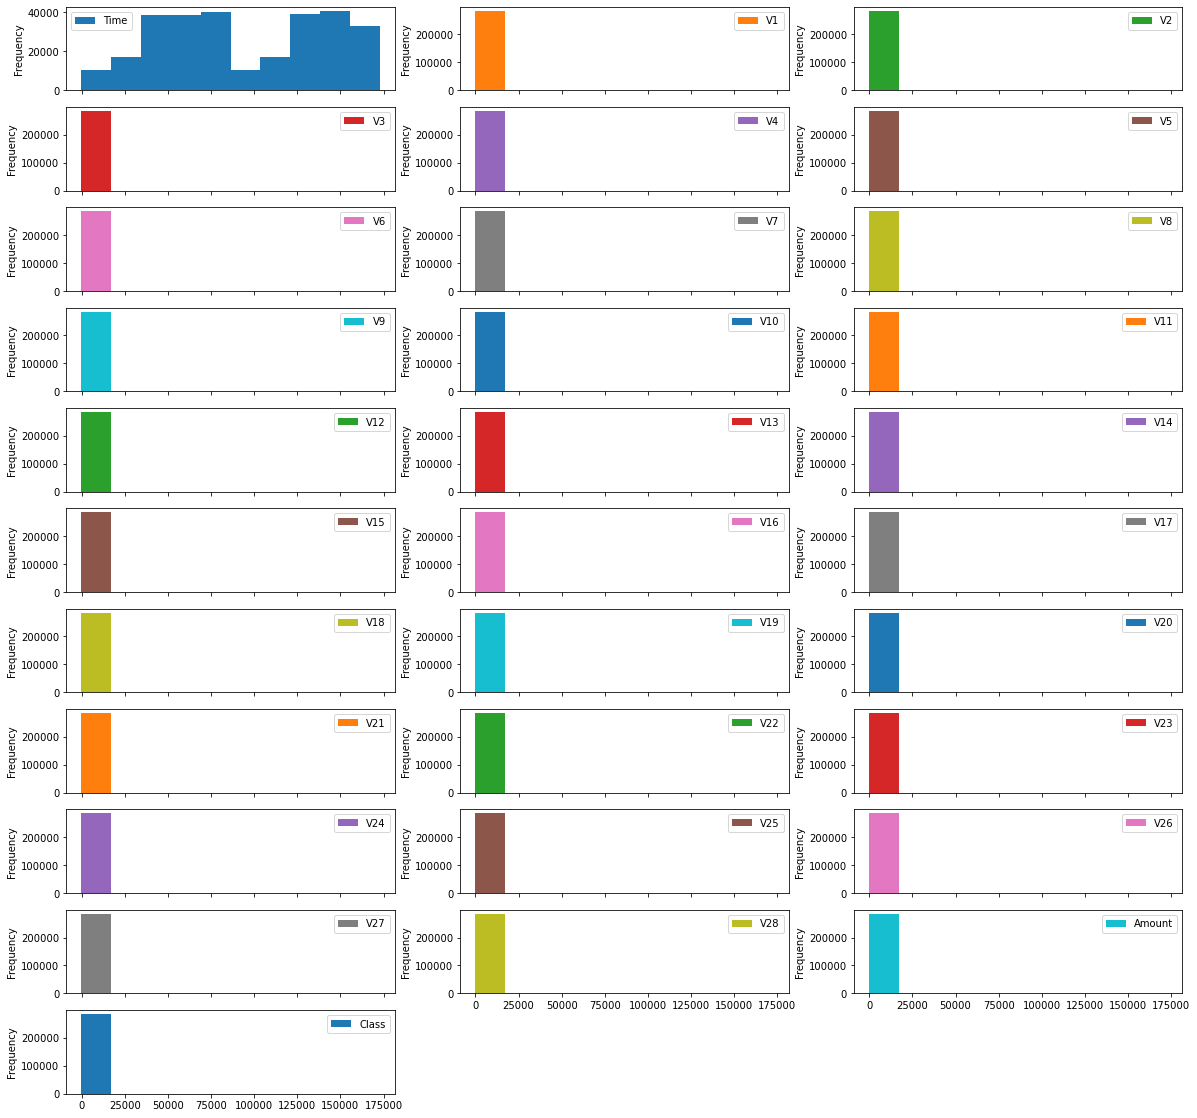

In [7]:
##histogram
data.plot.hist(subplots=True, legend=True, layout=(11,3),figsize = (20, 20))
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
# Check the distribution of legit and fraudulent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

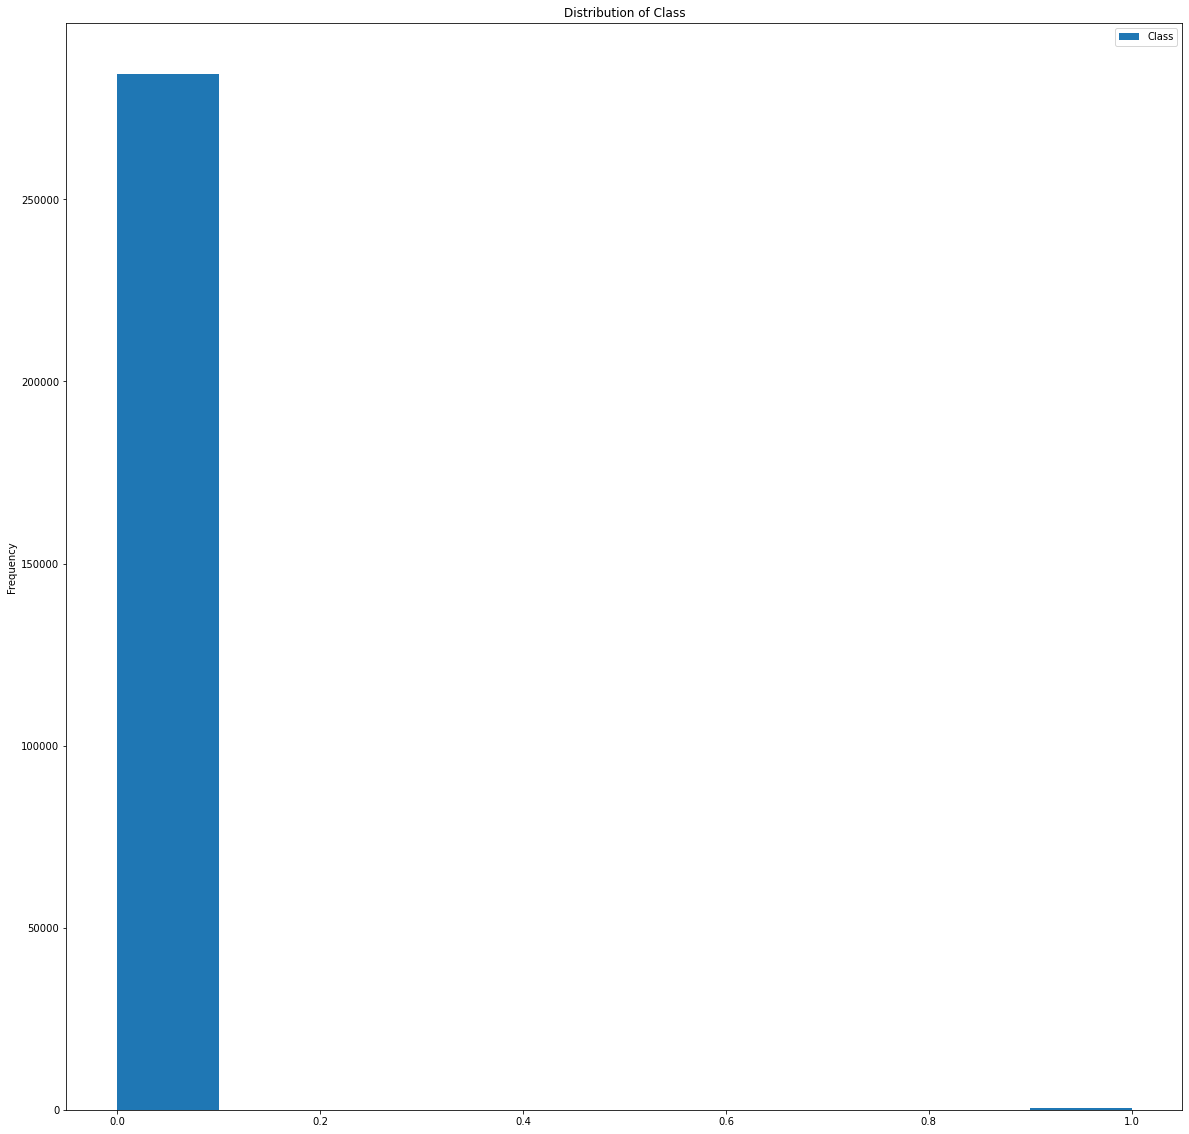

In [10]:
data["Class"].plot.hist(legend=True,figsize = (20,20))
plt.title('Distribution of Class')
plt.savefig('imbalancedclass.png', dpi=300, bbox_inches='tight')

In [11]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Transactions: {}'.format(len(Valid)))

Fraud Cases: 492
Valid Transactions: 284315


In [12]:
#under-sampling
Valid_sample = Valid.sample(n=492)

In [13]:
new_df = pd.concat([Valid_sample, Fraud], axis=0)

In [14]:
new_df.head().T

,199587,56109,36706,139841,72186
Time,133037.000000,47276.000000,38654.000000,83385.000000,54603.000000
V1,0.041895,1.244417,1.307491,0.839015,-0.747905
V2,0.247787,0.332755,-0.386108,-0.966869,1.181297
V3,0.673511,-0.888506,0.708504,1.052717,-0.508924
V4,-0.933076,1.309450,0.693677,0.414173,-1.220247
V5,0.123268,2.327048,-1.071842,-1.409734,2.477165
V6,0.235681,3.721675,-0.433778,-0.067532,3.218475
V7,-0.047584,-0.455895,-0.532750,-0.576633,0.077159
V8,0.269831,0.882484,-0.067941,0.184056,0.957842
V9,0.427984,-0.862883,-0.401805,1.302380,-0.120284


In [15]:
new_df.shape

(984, 31)

In [16]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

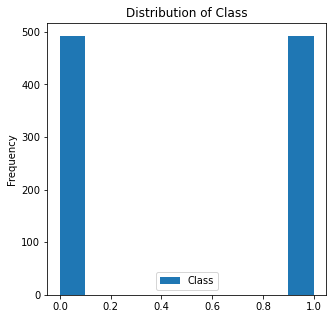

In [17]:
new_df["Class"].plot.hist(legend=True,figsize = (5,5))
plt.title('Distribution of Class')
plt.savefig('balancedclass.png', dpi=300, bbox_inches='tight')

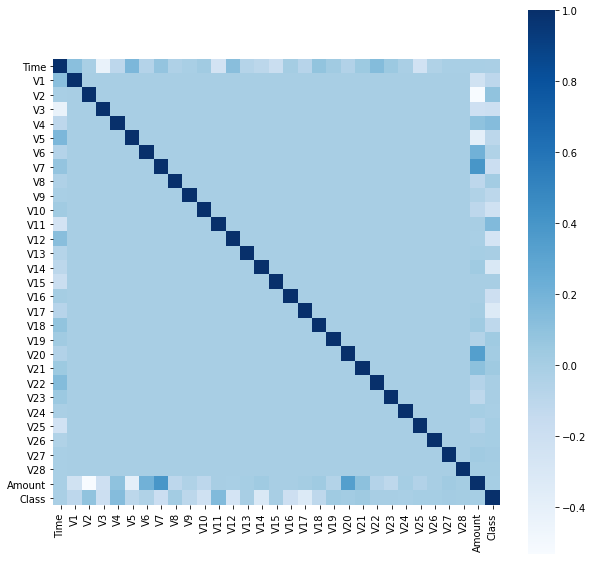

In [18]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(corrmat,square = True,cmap="Blues")
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Store the variable we'll be predicting on
X = new_df.drop(columns="Class",axis=1)
y = new_df["Class"]

# Print shapes
print(X.shape)
print(y.shape)

(984, 30)
(984,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Accuracy on train data
X_train_prediction = model.predict(X_train)
data_train_accuracy = accuracy_score(X_train_prediction, y_train)

In [25]:
data_train_accuracy

0.9428208386277002

In [26]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
X_test_prediction 

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [27]:
data_test_accuracy = accuracy_score(X_test_prediction, y_test)
data_test_accuracy

0.9137055837563451

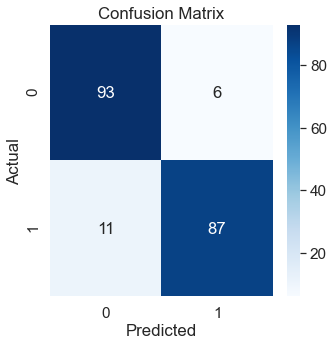

In [30]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test,X_test_prediction)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True,cmap="Blues")
plt.savefig('Confusionmatrix.png', dpi=300, bbox_inches='tight')
plt.show()

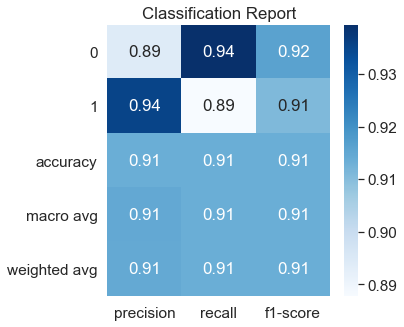

In [32]:
from sklearn.metrics import classification_report,accuracy_score
labels=["0","1"]
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(y_test,X_test_prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.savefig('Classficationreport.png', dpi=300, bbox_inches='tight')
plt.show()